In [5]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as c
import sympy as sy
import scipy.constants as pc
from sympy import *

In [6]:
# Funktionen
def am(werte):
    return np.mean(werte)

def std(werte):
    summen_der_quadrate = 0
    for wert in werte:
        summen_der_quadrate+=(wert-am(werte))**2       
    return np.sqrt(summen_der_quadrate/(werte.size-1))

def stu(werte):
    return std(werte)/np.sqrt(werte.size)

def fehler(f, werte, unsicherheiten, variablen):
    zMax = 0
    for i in range(werte.size):
        dif = np.abs(sy.diff(f, variablen[i]))
        zMax += (dif * unsicherheiten[i])**2
    zMax = sqrt(zMax)
    for j in range(werte.size):
        zMax = sub(zMax, variablen[j], werte[j])
    return zMax

def fehlerMax(f, werte, unsicherheiten, variablen):
    zMax = 0
    for i in range(werte.size):
        dif = np.abs(sy.diff(f, variablen[i]))
        zMax += dif * unsicherheiten[i]
    for j in range(werte.size):
        zMax = sub(zMax, variablen[j], werte[j])
    return zMax

def groessterBeitrag(f, werte, unsicherheiten, variablen):
    zMax = 0
    zMaxArray = np.array([])
    for i in range (werte.size):
        zMax = (np.abs(sy.diff(f, variablen[i])) * unsicherheiten[i])
        for j in range(werte.size):
            zMax = sub(zMax, variablen[j], werte[j])
        x = np.array([zMax])
        zMaxArray = np.append(zMaxArray, x)
    return variablen[np.argmax(zMaxArray)]

def sub(zMax, variable, wert):
    return zMax.subs([(variable, wert)])

def einfachGaussAdd(unsicherheiten, koeffizienten):
    dz = 0
    for i in range (unsicherheiten.size):
        dz += (unsicherheiten[i]*unsicherheiten[i])**2
    return sqrt(dz)

def einfachGaussMult(unsicherheiten, werte, exponenten):
    dz = 0
    for i in range (unsicherheiten.size):
        dz += (exponenten[i]*unsicherheiten[i]/werte[i])**2
    return sqrt(dz)

def vertraeglichkeit(am_1, am_2, stu_1, stu_2):
    return (np.abs(am_1-am_2)/(sqrt((stu_1**2)*(stu_2**2))))

def bestA(x, y):
    return (sum(x**2)*sum(y)-sum(x)*sum(x*y))/(x.size*sum(x**2)-sum(x)**2)

def bestB(x, y):
    return (x.size*sum(x*y)-sum(x)*sum(y))/(x.size*sum(x**2)-sum(x)**2)

def streuung(x, y):
    s = 0
    for i in range(x.size):
        s += (y[i]+(bestA(x, y)+bestB(x, y)*x[i]))**2
    return np.sqrt(s/(x.size-2))

def stuA(x, y):
    s = streuung(x, y)
    return s*np.sqrt(sum(x**2)/((x.size*sum(x**2)-sum(x)**2)))

def stuB(x, y):
    s = streuung(x, y)
    return s*np.sqrt(x.size/((x.size*sum(x**2)-sum(x)**2)))

def print_to_table(avgs, stds, rows, cols,
                   highlight_best=True,
                   max_is_best=True,
                   avg_format='{0:!>4.1f}',
                   std_format='{1:!<4.1f}',
                   file=None,
                   col_orientation='c'):
    # Find best values
    best_avg = {}
    if highlight_best:
        if max_is_best:
            for c in cols:
                idx = np.argmax(avgs[c], axis=0)
                best_avg[c] = idx
        else:
            for c in cols:
                idx = np.argmin(avgs[c], axis=0)
                best_avg[c] = idx

    # Header
    print_str = '\\begin{tabular}{l' + (" "+col_orientation) * len(cols) + '} \hline\n'
    for c in cols:
        print_str += ' & ' + c
    print_str += ' \\\\ \n \hline'

    # Content
    for m in range(len(rows)):
        row_name = rows[m]
        print_str += '\n{0}'.format(row_name)
        for c in cols:
            print_str += ' &\n '
            print_list = [avgs[c][m]]
            print_list += [stds[c][m]]
            if m == best_avg.get(c, None):
                print_str += ('$\mathbf{{'+ avg_format + ' \\pm ' + std_format + '}}$').format(*print_list)
            else:
                print_str += ('$'+ avg_format + ' \\pm ' + std_format + '$').format(*print_list)

        print_str += "\n \\vspace*{0.0mm} \\\\"
        print_str = print_str.replace('!', '\\phantom{0}')

    # Footer
    print_str += '\n \hline \n \end{tabular}'

    # Write output
    if file is None:
        print(print_str)
    else:
        with open(file, 'w') as f:
            f.write(print_str)

In [ ]:
# Standard plotting
fig, ax = plt.subplots(figsize=(10,10))

#ax.plot(x, y, color='b', label='label')
#ax.scatter(x, y, color='r', label='label')
#ax.errorbar(am_x, am_y, xerr=std_x, yerr=std_y, fmt='D', color='#d0740b', label='label')

ax.set(xlabel='x', ylabel='y', title='Titel')
ax.legend()
ax.grid()

#fig.savefig("test.png")

In [ ]:
# Erinnerungen
# x = np.array([,])
# x.size
# x, y = symbols('x y')
# expr = x*y
# expr.subs([(x, wert_x), (y, wert_y)])

In [20]:
# Messdaten
b = np.array([5, 10, 15, 20, 22.5, 25])# mm (+- .5)
r_1 = 4.4 # .05

r_außen = 638/2 # +-1mm

s = np.array([[778, 787, 789, 797, 800, 801, 801, 802, 804, 805, 807, 818, 827, 840, 881],
              [578, 588, 646, 656, 661, 666, 667, 670, 670, 674, 710, 718, 726, 726, 749], 
              [510, 549, 548, 549, 550, 550, 550, 551, 552, 555, 556, 561, 563, 564, 576], 
              [332, 362, 367, 373, 377, 379, 381, 381, 382, 384, 398, 400, 401, 403, 407], 
              [113, 197, 198, 234, 238, 239, 251, 254, 258, 264, 267, 268, 280, 289, 333], 
              [37]]) # mm (+- 1)
s_am = np.array([])
s_tot = r_außen*2*pi


for el in s:
    s_am = np.append(s_am, am(el))

theta = s_am*2*pi/s_tot
print(theta)
cos_theta = np.cos(theta)

fig, ax = plt.subplots(figsize=(5,5))

ax.scatter(theta, b, color='r', label='Datenpunkte')
ax.set(xlabel='$b$', ylabel='$\theta$', title='Aufzeichnung')
ax.legend()
ax.grid()

[2.53646812957158 2.11180773249739 1.73124346917450 1.19686520376176
 0.769696969696970 0.115987460815047]


TypeError: loop of ufunc does not support argument 0 of type Float which has no callable cos method

NameError: name 'cos_theta' is not defined

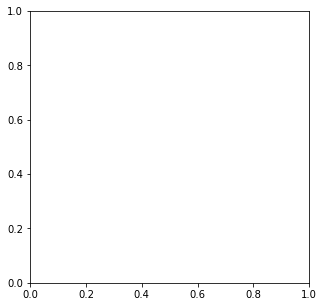

In [19]:
fig, ax = plt.subplots(figsize=(5,5))

ax.scatter(cos_theta, b, color='r', label='Datenpunkte')
#ax.errorbar(b_am, cos_theta_am, xerr=b_std, yerr=cos_theta_std, fmt='D', color='#d0740b', label='Errorleisten')
x = np.arange(0, 1, 0.1)

m, b = np.polyfit(b, theta, 1)
ax.plot(x,x*m+b,color='g',label="Regressionsgerade")

ax.set(xlabel='$b$', ylabel='$\cos{\dfrac{\theta}{2}}$', title='Aufzeichnung')
ax.legend()
ax.grid()